## 初值问题
已知微分方程的初始条件，即自变量为零时的函数值
#### 一阶常微分方程  
$$\left.\left\{\begin{array}{l}\mathrm{\frac{dy}{dt}=f(y,t)}\\\mathrm{y(t_0)=y_0}\end{array}\right.\right.$$

**scipy.integrate.odeint**  
```python
# func: callable(y, t, …)  导数函数 f(y, t) ，即 y 在 t 处的导数，以函数的形式表示
# y0: array： 初始条件y0，对于常微分方程组y0则为数组向量
# t: array： 求解函数值对应的时间点的序列，序列的第一个元素是与初始条件y0对应的初始时间t0；时间序列必须是单调递增或单调递减的，允许重复值
# args: array: func中除了y,t其余的参数
scipy.integrate.odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0, tfirst=False)
```

例：  
$$\left.\left\{\begin{array}{l}\frac{\mathrm{dy}}{\mathrm{dt}}=\sin(\mathrm{t}^2)\\\mathrm{y}(-10)=1\end{array}\right.\right.$$

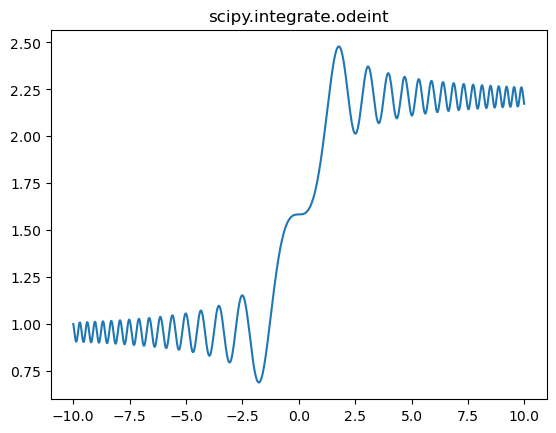

In [1]:
# (scipy.integrate.odeint)
from scipy.integrate import odeint  # 导入 scipy.integrate 模块
import numpy as np
import matplotlib.pyplot as plt

def dy_dt(y, t):  # 定义函数 f(y,t)
    return np.sin(t**2)

y0 = [1]  # y0 = 1 也可以
t = np.arange(-10,10,0.01)  # (start,stop,step)
y = odeint(dy_dt, y0, t)  # 求解微分方程初值问题

# 绘图
plt.plot(t, y)
plt.title("scipy.integrate.odeint")
plt.show()


例：洛伦兹方程  
$$\begin{aligned}
&\mathrm{\frac{dx}{dt}=\sigma(y-x)} \\
&\mathrm{\frac{dy}{dt}=x(p-z)-y} \\
&\frac{dz}{dt}=\mathrm{xy}-\mathrm{\beta z}
\end{aligned}$$

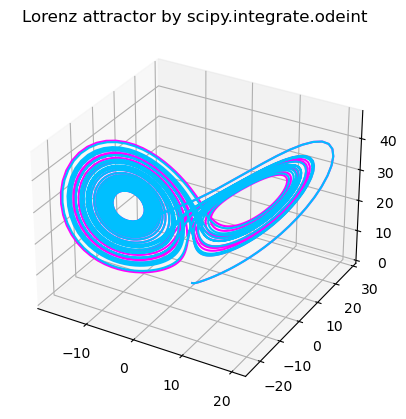

In [10]:
from scipy.integrate import odeint    # 导入 scipy.integrate 模块
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 导数函数, 求 W=[x,y,z] 点的导数 dW/dt
def lorenz(W,t,p,r,b):  # by youcans
    x, y, z = W  # W=[x,y,z]
    dx_dt = p*(y-x)  # dx/dt = p*(y-x), p: sigma
    dy_dt = x*(r-z) - y  # dy/dt = x*(r-z)-y, r:rho
    dz_dt = x*y - b*z  # dz/dt = x*y - b*z, b;beta
    return np.array([dx_dt,dy_dt,dz_dt])

t = np.arange(0, 30, 0.01)  # 创建时间点 (start,stop,step)
paras = (10.0, 28.0, 3.0)  # 设置 Lorenz 方程中的参数 (p,r,b)

# 调用ode对lorenz进行求解, 用两个不同的初始值 W1、W2 分别求解
W1 = (0.0, 1.00, 0.0)  # 定义初值为 W1
track1 = odeint(lorenz, W1, t, args=(10.0, 28.0, 3.0))  # args 设置导数函数的参数
W2 = (0.0, 1.01, 0.0)  # 定义初值为 W2
track2 = odeint(lorenz, W2, t, args=paras)  # 通过 paras 传递导数函数的参数

# 绘图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # 创建一个 3D 坐标系
ax.plot(track1[:,0], track1[:,1], track1[:,2], color='magenta') # 绘制轨迹 1
ax.plot(track2[:,0], track2[:,1], track2[:,2], color='deepskyblue') # 绘制轨迹 2
ax.set_title("Lorenz attractor by scipy.integrate.odeint")
plt.show()

#### 高阶常微分方程
例：RLC方程  
$$\left.\left\{\begin{aligned}&\frac{\mathrm{d}^2\mathrm{u}}{\mathrm{d}\mathrm{t}^2}+2a\frac{\mathrm{d}\mathrm{u}}{\mathrm{d}\mathrm{t}}+\omega_0^2\mathrm{u}=0\\&\mathrm{u}(0)=\mathrm{U}_0\\&\mathrm{u}^{\prime}(0)=0\end{aligned}\right.\right.$$

转化为  
$$\left.\left\{\begin{array}{l}\frac{\mathrm{du}}{\mathrm{dt}}=\mathrm{v}\\\frac{\mathrm{dv}}{\mathrm{dt}}=-2\mathrm{\alpha v}-\mathrm{\omega}_0^2\mathrm{u}\\\mathrm{u}(0)=\mathrm{U}_0\\\mathrm{v}(0)=0\end{array}\right.\right.$$

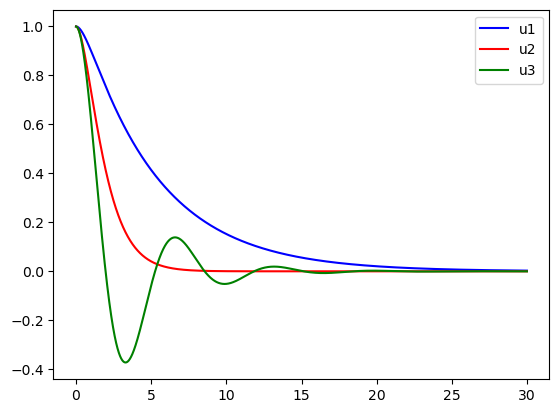

In [11]:
from scipy.integrate import odeint  # 导入 scipy.integrate 模块
import numpy as np
import matplotlib.pyplot as plt


def RLC(y, t, a, w):
    u, v = y
    du_dt = v
    dv_dt = -2 * a * v - (w ** 2) * u
    return [du_dt, dv_dt]


# y0初值
u0 = 1.0
v0 = 0.0
y = [u0, v0]
# t
t = np.arange(0, 30, 0.01)
# args
param = (1, 0.6)
track = odeint(RLC, y0=y, t=t, args=param)
plt.plot(t, track[:, 0], label="u1", color="blue")
param = (1, 1)
track = odeint(RLC, y0=y, t=t, args=param)
plt.plot(t, track[:, 0], label="u2", color="red")
param = (0.3, 1)
track = odeint(RLC, y0=y, t=t, args=param)
plt.plot(t, track[:, 0], label="u3", color="green")
plt.legend(loc='best')
plt.show()

## 边值问题  
[官方文档](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_bvp.html)  
已知微分方程的边界条件，即自变量在边界点时的函数值  

**一般形式**  
$$\mathrm{y^{\prime\prime}=f(x,y,y^{\prime}),}\quad\mathrm{a<x<b}$$
**第一类边界条件**  
$$\mathrm{y(a)=ya,y(b)=yb}$$  
**第二类边界条件**  
$$\mathrm{y^{\prime}(a)=ya,y^{\prime}(b)=yb}$$  
**第三类边界条件**  
$$\begin{cases}\mathrm{y^{\prime}(a)-a_0~y(a)=a_1}\\\mathrm{y^{\prime}(b)-b_0~y(b)=b_1}&\end{cases}$$  
转化为  
$$\begin{cases}\mathrm{y~'=f(x,y),\quad a<x<b}\\\mathrm{g(y(a),y(b)=0)}&\end{cases}\newline
\begin{cases}\mathrm{y(a)-ya=0}\\\mathrm{y(b)-yb=0}&\end{cases}$$

**scipy.integrate.solve_bvp()**  
```python
# func: callable fun(x, y, …) 　　导数函数f(y,x) ， y 在 x 处的导数，以函数的形式表示。可以带有参数 p
# bc: callable bc(ya, yb, …) 　　边界条件，y 在两点边界的函数，以函数的形式表示。可以带有参数 p
# x: array：　　初始网格的序列，shape (m,)。必须是单调递增的实数序列，起止于两点边界值 xa，xb
# y: array：　　网格节点处函数值的初值，shape (n,m)，第 i 列对应于 x[i]
# p: array：　　可选项，向导数函数 func、边界条件函数 bc 传递参数
scipy.integrate.solve_bvp(fun, bc, x, y, p=None, S=None, fun_jac=None, bc_jac=None, tol=0.001, max_nodes=1000, verbose=0, bc_tol=None)
# 返回值
# sol: PPoly 　　通过 PPoly （如三次连续样条函数）插值求出网格节点处的 y 值
# x: array 　　数组，形状为 (m,)，最终输出的网格节点
# y: array 　　二维数组，形状为 (n,m)，输出的网格节点处的 y 值
# yp: array 　　二维数组，形状为 (n,m)，输出的网格节点处的 y’ 值
```

例：  
$$\left.\left\{\begin{aligned}\mathrm{y}^{\prime\prime}+|\mathrm{y}|&=0\\\mathrm{y}(\mathrm{x}=0)&=0.5\\\mathrm{y}(\mathrm{x}=4)&=-1.5\end{aligned}\right.\right.$$  
转化为  
$$\begin{cases}\mathrm{y}_0^{'}=\mathrm{y}_1\\\mathrm{y}_1^{'}=-\left|\mathrm{y}_0\right|\\\mathrm{y}(\mathrm{x}=0)-0.5=0\\\mathrm{y}(\mathrm{x}=4)+1.5=0\end{cases}$$

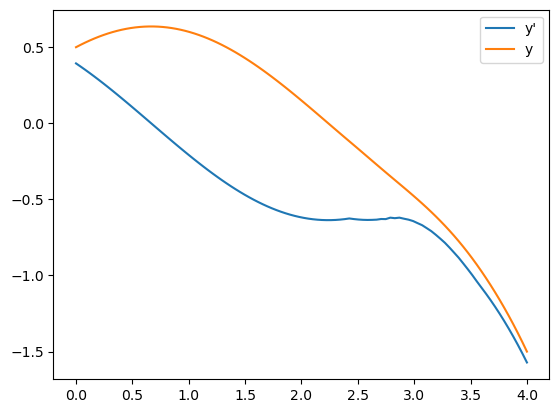

In [4]:
from scipy.integrate import odeint, solve_bvp  # 导入 scipy.integrate 模块
import numpy as np
import matplotlib.pyplot as plt


def dy(x, y):
    dy0 = y[1]
    dy1 = -abs(y[0])
    # print(np.vstack((dy0, dy1)).shape)
    return np.asarray([dy0, dy1])


def bound(y_a, y_b):
    ya = 0.5
    yb = -1.5
    return np.array([y_a[0] - ya, y_b[0] - yb])


res = solve_bvp(dy, bound, x=np.linspace(0, 4, 20), y=np.zeros((2, 20)))
x = np.linspace(0, 4, 100)
y = res.sol(x)
plt.plot(x, y[1], label="y'")
plt.plot(x, y[0], label="y")
plt.legend(loc='best')
plt.show()


例：  
$$\left.\left\{\begin{array}{l}\frac{\mathrm{d}^2\mathrm{h}}{\mathrm{dx}^2}+[1-\mathrm{h}]*[1+(\frac{\mathrm{dh}}{\mathrm{dx}})^2]^{3/2}=0\\\mathrm{h(x=-1)=h(x=1)=0}\end{array}\right.\right.$$  
转化为  
$$\begin{cases}\mathrm{h_0^{'}=h_1}\\\mathrm{h_1^{'}=(h_0-1)*[1+h_1^2]^{3/2}}\\\mathrm{h_0(x=-1)=h_0(x=1)=0}&\end{cases}$$

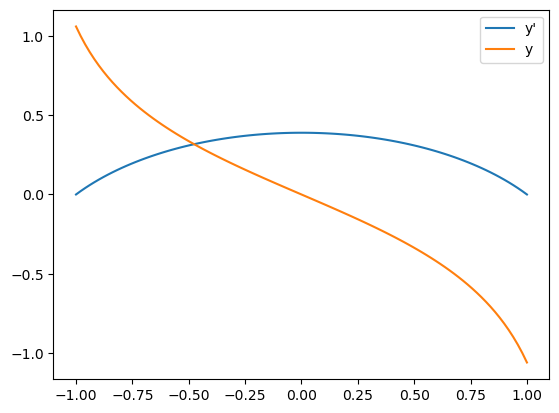

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_bvp


def dh(x, h):
    dh0 = h[1]
    dh1 = (h[0] - 1) * ((1 + (h[1] ** 2)) ** 1.5)
    return np.asarray([dh0, dh1])


def bound(y_a, y_b):
    return np.array([y_a[0], y_b[0]])


res = solve_bvp(dh, bound, np.linspace(-1, 1, 20), np.zeros((2, 20)))
x = np.linspace(-1, 1, 100)
y = res.sol(x)
plt.plot(x, y[0], label="y'")
plt.plot(x, y[1], label="y")
plt.legend(loc='best')
plt.show()


例：  
$$\mathrm{\frac{d^2y}{dx^2}~+[\lambda-2q\cos(2x)]~y=0}$$  
转化为  
$$\begin{cases}\mathrm{y}_0^{'}=\mathrm{y}_1\\\mathrm{y}_1^{'}=-[\lambda-2\mathrm{q}\cos(2\mathrm{x})]\mathrm{~y}_0\\\mathrm{y}_0\left(\mathrm{x}=0\right)=1\\\mathrm{y}_1\left(\mathrm{x}=0\right)=0\\\mathrm{y}_1\left(\mathrm{x}=\pi\right)=0\end{cases}$$

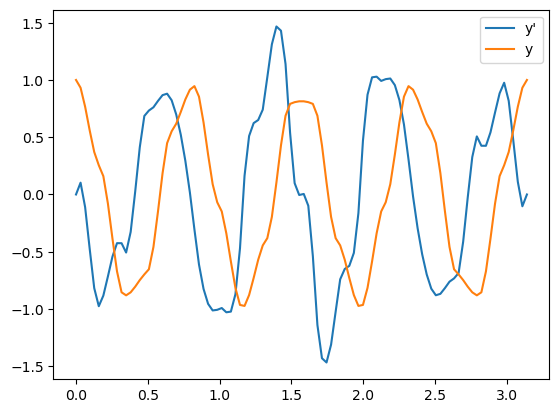

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_bvp


def dy(x, y, p):
    lambda_ = p[0]
    q = 10
    dy0 = y[1]
    dy1 = (2 * q * np.cos(2 * x) - lambda_) * y[0]
    return np.asarray([dy0, dy1])


def bound(ya, yb, p):
    return np.asarray([ya[0] - 1, ya[0], yb[0]])


x = np.linspace(0, np.pi, 20)
y0 = np.cos(8 * x)
y1 = -1 * np.sin(8 * x) #参数可调
y = np.asarray([y0, y1])
res = solve_bvp(dy, bound, x=x, y=y, p=[10])
x = np.linspace(0, np.pi, 100)
y = res.sol(x)
plt.plot(x, y[1], label="y'")
plt.plot(x, y[0], label="y")
plt.legend(loc='best')
plt.show()
